# Plot temperature as a function of various times

In [1]:
#%%capture 
# Important libraries header information
# ----------------------------------

# change this directory as necessary
#amrwindfedir = '/home/lcheung/hpc_home/local/Git/amrwind-frontend'   # my version
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
import sys, os
sys.path.insert(1, amrwindfedir)

# Important header information
naluhelperdir = '/projects/AWAKEN/lcheung/awaken.github/naluhelperscripts/'
sys.path.insert(1, naluhelperdir)
import plotABLstats
import yaml as yaml
from matplotlib.lines import Line2D

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re
import time
import pandas as pd

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Average between 15,000 sec to 20,000 sec
avgtimes = [{'avgt':[20500, 20500+600], 'lstyle':{'ls':'--'}, 'iWRF':16},
            {'avgt':[24100, 24100+600], 'lstyle':{'ls':':'}, 'iWRF':22},
            #{'avgt':[21000, 21600], 'lstyle':{'ls':'--'}},
            #{'avgt':[22000, 22600], 'lstyle':{'ls':'-.'}},
            #{'avgt':[23000, 23600], 'lstyle':{'ls':':'}},
            #{'avgt':[24000, 24600], 'lstyle':{'ls':'--', 'lw':1.5}},
           ]

In [3]:
AMRDIR='/projects/00000000/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD/'
NALUDIR='/pscratch/mlblayl/AWAKEN/Neutral_Precursor_Yaw'

initTprof = [[ 0, 650.0, 750.0, 1000.0],
             [ 305, 305, 313.0, 313.75]
            ]
initTprof = np.array(initTprof).transpose()

In [4]:
# load the AMR-Wind data
case = amrwind.MyApp.init_nogui()
case.ABLpostpro_loadnetcdffile(AMRDIR+'/post_processing/abl_statistics40000.nc', usemmap=False)

Loading /projects/00000000/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD//post_processing/abl_statistics40000.nc
Time range: 20000.500000 to 25000.000000
Done.


In [5]:
amrTdat = {}
for iavg, avgdict in enumerate(avgtimes):
    avgt = avgdict['avgt']
    amrTdat[iavg] = case.ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgt)

Loading theta
Loading theta


In [6]:
# Load the Nalu-Wind data
naludata = plotABLstats.ABLStatsFileClass(stats_file=NALUDIR+'/abl_statistics.nc')

The netcdf file contains the variables:
time (10001,)
heights (97,)
density (10001, 97)
velocity (10001, 97, 3)
velocity_tavg (10001, 97, 3)
sfs_stress (10001, 97, 6)
resolved_stress (10001, 97, 6)
sfs_stress_tavg (10001, 97, 6)
resolved_stress_tavg (10001, 97, 6)
temperature (10001, 97)
temperature_tavg (10001, 97)
temperature_sfs_flux_tavg (10001, 97, 3)
temperature_resolved_flux (10001, 97, 3)
temperature_variance (10001, 97)
temperature_resolved_flux_tavg (10001, 97, 3)
temperature_variance_tavg (10001, 97)
utau (10001,)


In [7]:
naluTdat = {}
for iavg, avgdict in enumerate(avgtimes):
    avgt = avgdict['avgt']
    Tprof,  Theader = plotABLstats.plottemperatureprofile(naludata, None, tlims=avgt, exportdata=True)
    naluTdat[iavg] = Tprof

In [8]:
# Load the WRF data
WRFdat = pd.read_csv('WRF_potTemp_timeheights_D1.csv')
WRFz = [float(z) for z in WRFdat.columns[1:]]
WRFtimes = [16, 22]

#print(WRFdat.loc[16].values[0], WRFdat.loc[22].values[0])

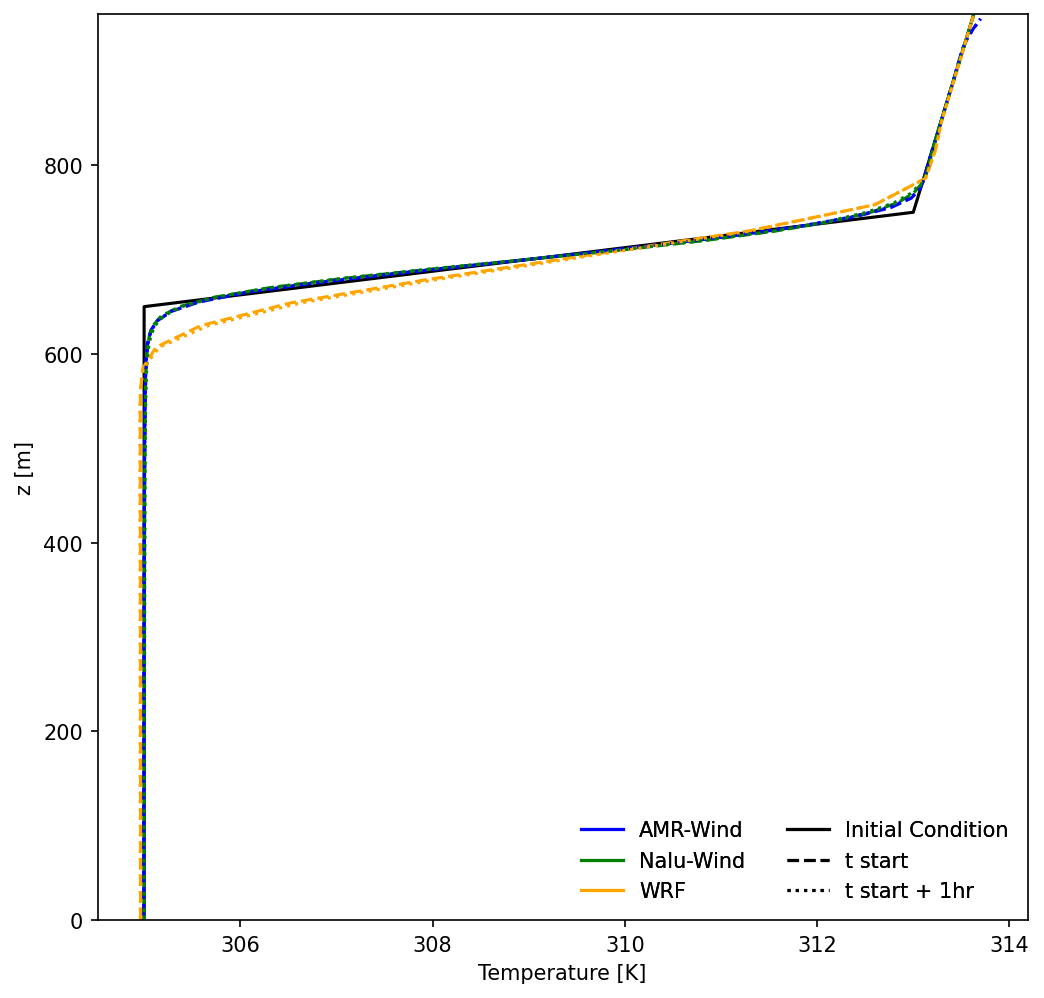

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)

plt.plot(initTprof[:,1], initTprof[:,0], 'k')
for iavg, avgdict in enumerate(avgtimes):
    lstyle = avgdict['lstyle']
    ax.plot(amrTdat[iavg]['T']['data'], amrTdat[iavg]['T']['z'], color='b', **lstyle)
    ax.plot(naluTdat[iavg][:,1], naluTdat[iavg][:,0], color='g', **lstyle)
    iWRF = avgdict['iWRF']
    WRFT = WRFdat.loc[iWRF].values[1:]
    ax.plot(WRFT, WRFz, color='orange', **lstyle)
    
ax.set_ylim([0, 960])
#plt.ylim([650, 700])
#plt.xlim([305, 310])
ax.set_ylabel('z [m]')
ax.set_xlabel('Temperature [K]')

# Add Legend
legfontsize=10
legend1 = plt.legend([
                      Line2D([0],[0], linestyle='-', color='b', lw=1.5),
                      Line2D([0],[0], linestyle='-', color='g', lw=1.5),
                      Line2D([0],[0], linestyle='-', color='orange', lw=1.5),

                      Line2D([0],[0], linestyle='-', color='k', ),
                      Line2D([0],[0], linestyle='--', color='k', ),
                      Line2D([0],[0], linestyle=':', color='k', ),
                      ], 
                      ['AMR-Wind', 'Nalu-Wind', 'WRF', 'Initial Condition', 't start','t start + 1hr',], 
                      fontsize=legfontsize, frameon=False, loc='lower right', ncol=2)
ax.add_artist(legend1)

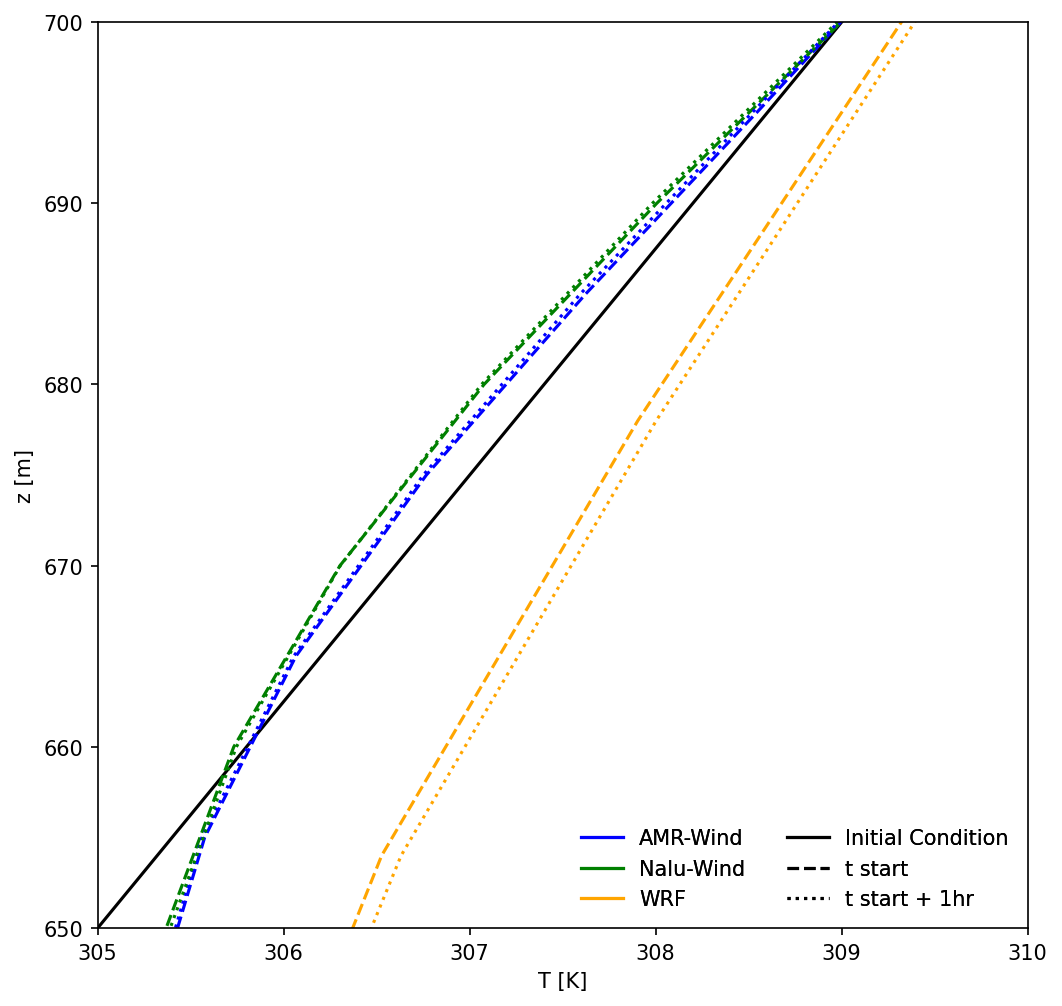

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)

plt.plot(initTprof[:,1], initTprof[:,0], 'k')
for iavg, avgdict in enumerate(avgtimes):
    lstyle = avgdict['lstyle']
    ax.plot(amrTdat[iavg]['T']['data'], amrTdat[iavg]['T']['z'], color='b', **lstyle)
    ax.plot(naluTdat[iavg][:,1], naluTdat[iavg][:,0], color='g', **lstyle)
    iWRF = avgdict['iWRF']
    WRFT = WRFdat.loc[iWRF].values[1:]
    ax.plot(WRFT, WRFz, color='orange', **lstyle)
    
#plt.ylim([0, 960])
plt.ylim([650, 700])
plt.xlim([305, 310])
plt.ylabel('z [m]')
plt.xlabel('T [K]')

# Add Legend
legfontsize=10
legend1 = plt.legend([
                      Line2D([0],[0], linestyle='-', color='b', lw=1.5),
                      Line2D([0],[0], linestyle='-', color='g', lw=1.5),
                      Line2D([0],[0], linestyle='-', color='orange', lw=1.5),

                      Line2D([0],[0], linestyle='-', color='k', ),
                      Line2D([0],[0], linestyle='--', color='k', ),
                      Line2D([0],[0], linestyle=':', color='k', ),
                      ], 
                      ['AMR-Wind', 'Nalu-Wind', 'WRF', 'Initial Condition', 't start','t start + 1hr',], 
                      fontsize=legfontsize, frameon=False, loc='lower right', ncol=2)
ax.add_artist(legend1)